In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder




In [2]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Data.csv' , header = 0 ,low_memory = False )

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,data
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:

df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,data
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [5]:
df.info

<bound method DataFrame.info of         duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  d

In [6]:

print(df.duplicated().sum())


0


In [7]:
dups = df[df.duplicated(keep=False)]
print(dups)



Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, class, data]
Index: []

[0 rows x 43 columns]


In [8]:
df.isnull().values.any()

np.False_

In [9]:
for col in df.columns:
    print("Unique Values for ", col , " are :")
    print(df[col].unique())
    print("value counts are :")
    print(df[col].value_counts())

Unique Values for  duration  are :
[    0  5607   507 ...  5430 11680   679]
value counts are :
duration
0        115955
1          1989
2           843
3           557
4           351
          ...  
12039         1
9235          1
41254         1
36613         1
679           1
Name: count, Length: 2981, dtype: int64
Unique Values for  protocol_type  are :
['tcp' 'udp' 'icmp']
value counts are :
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64
Unique Values for  service  are :
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nn

In [10]:
df['class'] = df['class'].astype('category')

In [11]:
for col in df.columns:
    print(df[col].dtypes)

int64
object
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
category
int64


In [12]:

attack_dict = {
    'normal': 'normal',

    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',

    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',

    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

df['class'] = df['class'].map(attack_dict)

In [13]:
#checking existing columns before dropping
print("Available columns:", df.columns)


Available columns: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'data'],
      dtype='object')


In [14]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,data
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [15]:
columns_to_check = ['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login']
for col in columns_to_check:
    print(df[col].value_counts())

land
0    125948
1        25
Name: count, dtype: int64
logged_in
0    76121
1    49852
Name: count, dtype: int64
root_shell
0    125804
1       169
Name: count, dtype: int64
is_host_login
0    125972
1         1
Name: count, dtype: int64
is_guest_login
0    124786
1      1187
Name: count, dtype: int64


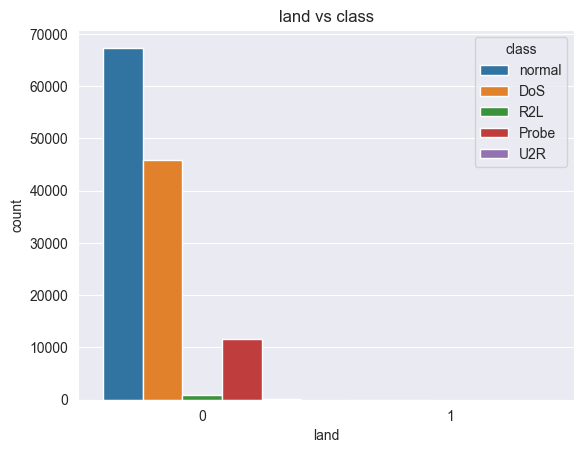

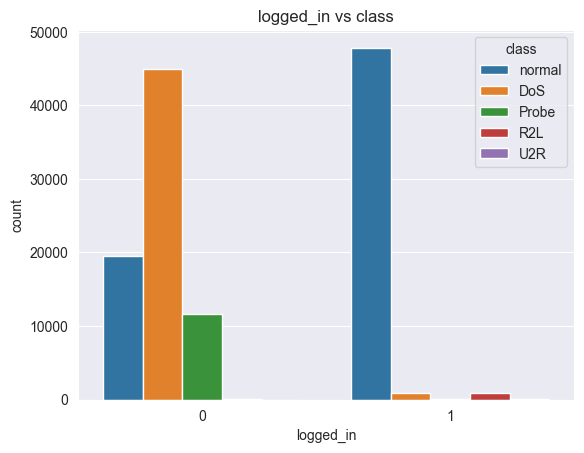

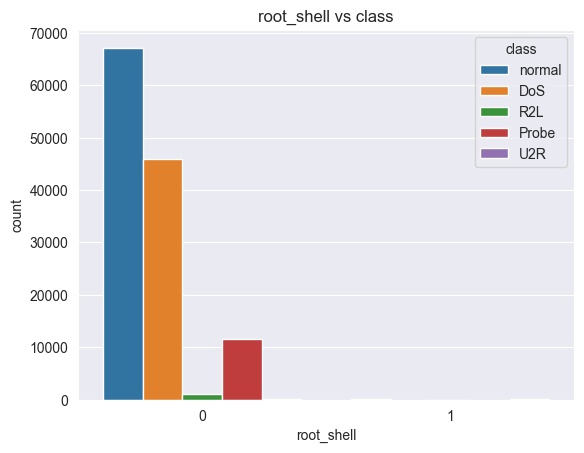

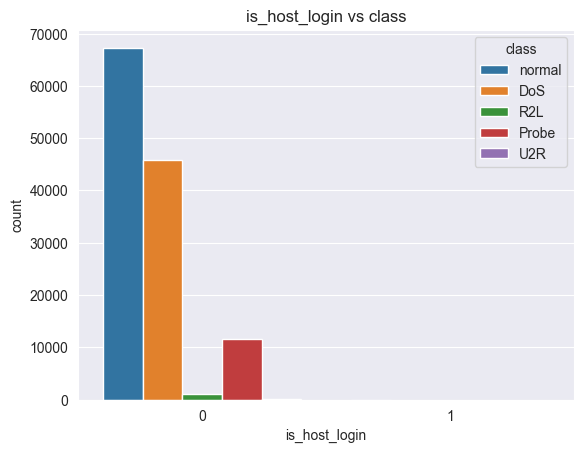

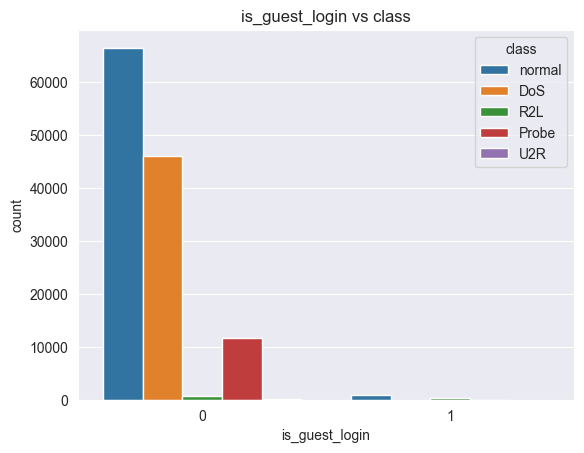

In [16]:
binary_cols = ['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login']
for col in binary_cols:
    sn.countplot(x=col, hue='class', data=df)
    plt.title(f"{col} vs class")
    plt.show()

In [17]:
binary_features = ['logged_in', 'is_guest_login']
#weekly correlated so well keep both
corr_matrix = df[binary_features].corr()
print(corr_matrix)

                logged_in  is_guest_login
logged_in        1.000000        0.119678
is_guest_login   0.119678        1.000000


In [18]:
df.drop(columns = 'data' , inplace = True)

In [19]:

binary_cols = ['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login']

for col in binary_cols:
    if col != 'land':
        contingency_table = pd.crosstab(df['land'], df[col])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        print(f"Chi2 test between 'land' and '{col}': p-value = {p:.4f}")

Chi2 test between 'land' and 'logged_in': p-value = 0.0001
Chi2 test between 'land' and 'root_shell': p-value = 1.0000
Chi2 test between 'land' and 'is_host_login': p-value = 1.0000
Chi2 test between 'land' and 'is_guest_login': p-value = 1.0000


In [20]:
binary_cols = ['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login']

for col in binary_cols:
    if col != 'is_host_login':
        contingency_table = pd.crosstab(df['is_host_login'], df[col])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        print(f"Chi2 test between 'is_host_login' and '{col}': p-value = {p:.4f}")

Chi2 test between 'is_host_login' and 'land': p-value = 1.0000
Chi2 test between 'is_host_login' and 'logged_in': p-value = 0.8312
Chi2 test between 'is_host_login' and 'root_shell': p-value = 1.0000
Chi2 test between 'is_host_login' and 'is_guest_login': p-value = 1.0000


In [21]:
df.drop(columns =  'num_outbound_cmds' , inplace=True)

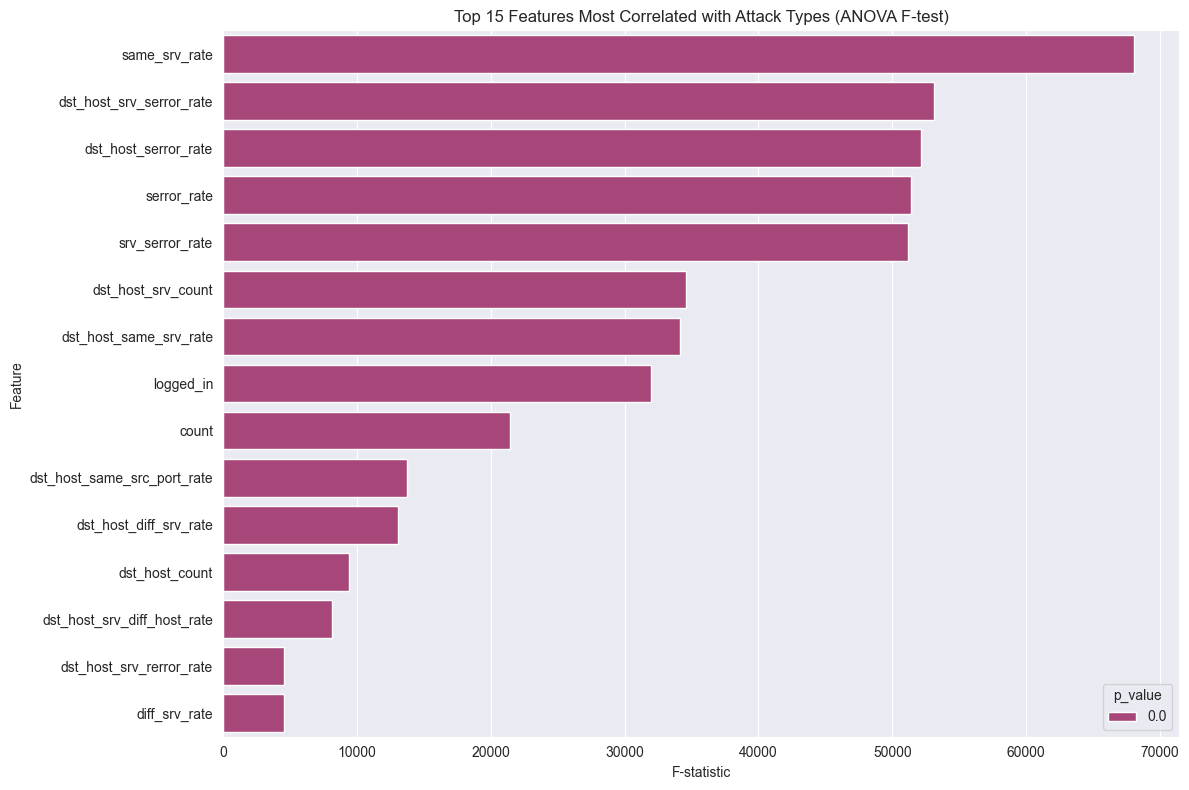

In [22]:
X = df.select_dtypes(include=['int64', 'float64'])
y = df['class']

f_values, p_values = f_classif(X, y)

anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F_value': f_values,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
sn.barplot(data=anova_df.head(15), x='F_value', y='Feature', palette="magma" , hue='p_value')
plt.title('Top 15 Features Most Correlated with Attack Types (ANOVA F-test)')
plt.xlabel('F-statistic')
plt.tight_layout()
plt.show()

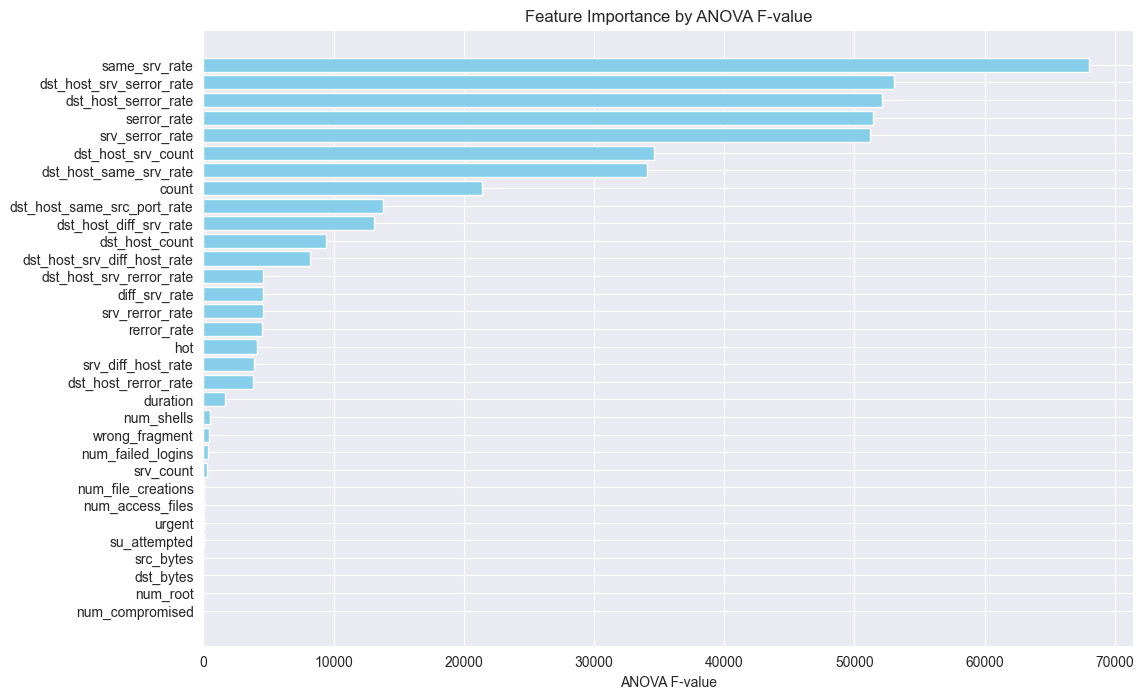

In [23]:
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming your dataframe is df and target column is 'class' (categorical)

# Extract numerical features only (exclude protocol_type, service, flag)
numerical_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent',
    'hot', 'num_failed_logins', 'num_compromised', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'count', 'srv_count',
    'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]

X = df[numerical_cols]
y = df['class']  # your target categorical column

# Calculate ANOVA F-value and p-values
f_values, p_values = f_classif(X, y)

# Create DataFrame for plotting
anova_df = pd.DataFrame({
    'feature': numerical_cols,
    'f_value': f_values,
    'p_value': p_values
}).sort_values(by='f_value', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(anova_df['feature'], anova_df['f_value'], color='skyblue')
plt.xlabel('ANOVA F-value')
plt.title('Feature Importance by ANOVA F-value')
plt.gca().invert_yaxis()
plt.show()


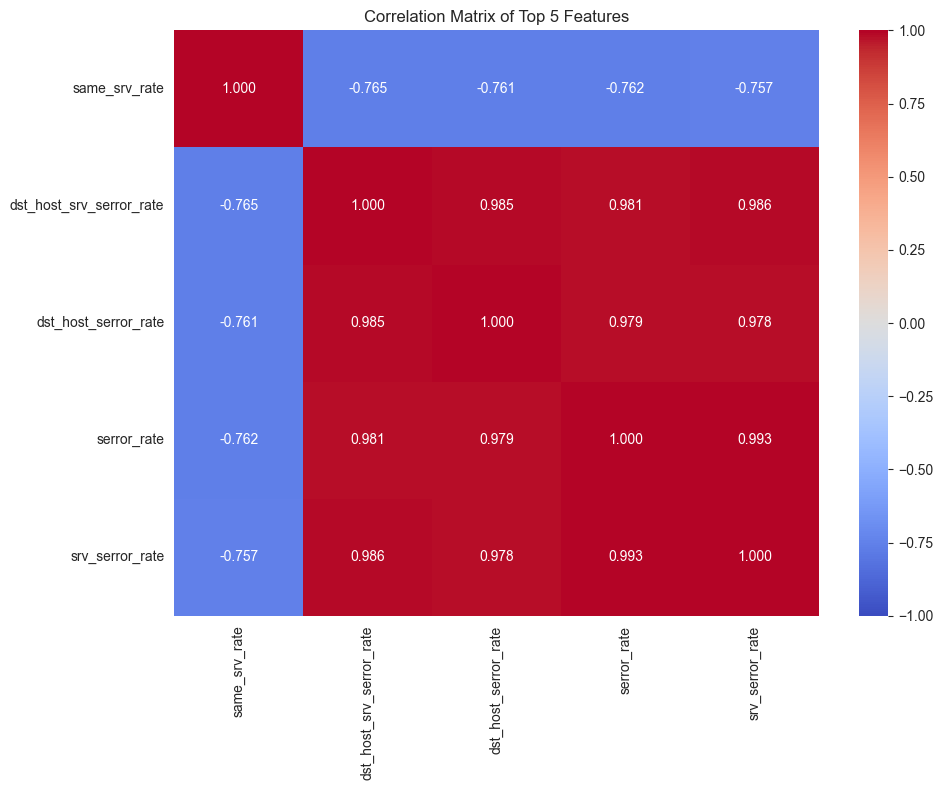

Correlation between top features:
same_srv_rate vs dst_host_srv_serror_rate: -0.765
  ⚠️ High correlation detected: 0.765
same_srv_rate vs dst_host_serror_rate: -0.761
  ⚠️ High correlation detected: 0.761
same_srv_rate vs serror_rate: -0.762
  ⚠️ High correlation detected: 0.762
same_srv_rate vs srv_serror_rate: -0.757
  ⚠️ High correlation detected: 0.757
dst_host_srv_serror_rate vs dst_host_serror_rate: 0.985
  ⚠️ High correlation detected: 0.985
dst_host_srv_serror_rate vs serror_rate: 0.981
  ⚠️ High correlation detected: 0.981
dst_host_srv_serror_rate vs srv_serror_rate: 0.986
  ⚠️ High correlation detected: 0.986
dst_host_serror_rate vs serror_rate: 0.979
  ⚠️ High correlation detected: 0.979
dst_host_serror_rate vs srv_serror_rate: 0.978
  ⚠️ High correlation detected: 0.978
serror_rate vs srv_serror_rate: 0.993
  ⚠️ High correlation detected: 0.993


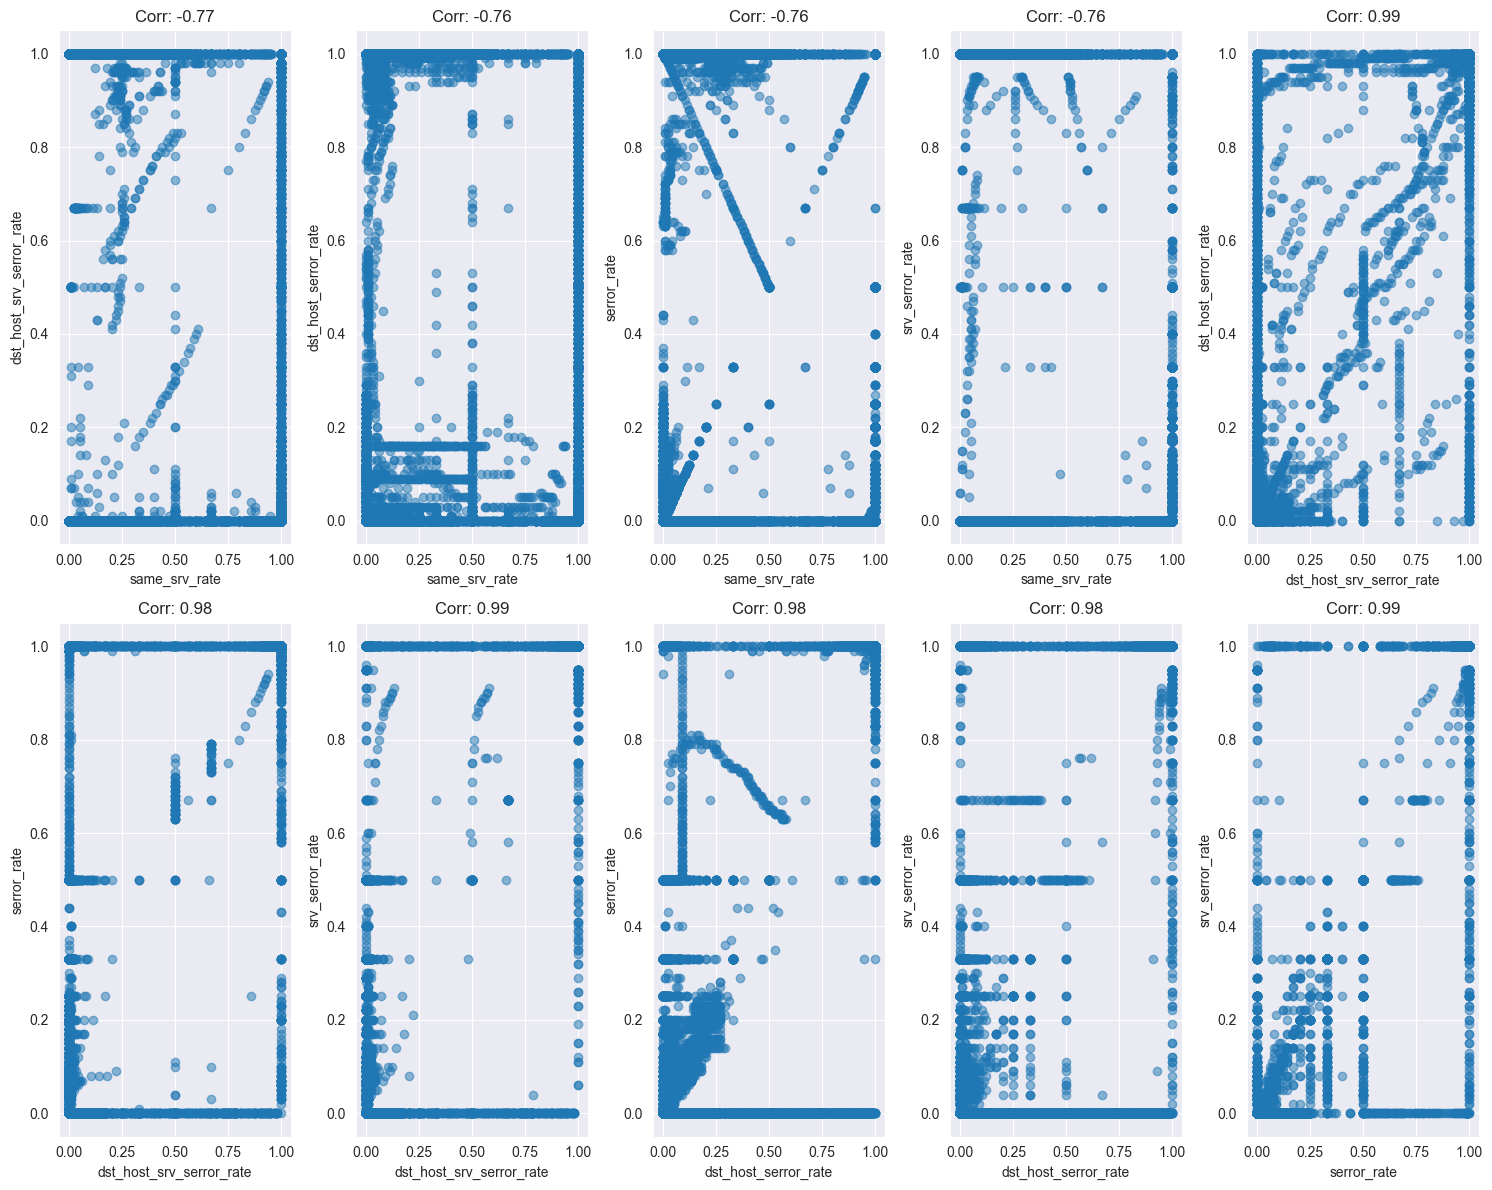

In [24]:
# Assuming df is your dataframe with the features
# Define the top features
top_features = [
    'same_srv_rate',
    'dst_host_srv_serror_rate',
    'dst_host_serror_rate',
    'serror_rate',
    'srv_serror_rate'
]

# Calculate the correlation matrix for just these features
corr_matrix = df[top_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f")
plt.title('Correlation Matrix of Top 5 Features')
plt.tight_layout()
plt.savefig('top5_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the correlation values (excluding self-correlations)
print("Correlation between top features:")
for i, f1 in enumerate(top_features):
    for j, f2 in enumerate(top_features):
        if i < j:  # Only print each pair once
            corr = corr_matrix.loc[f1, f2]
            print(f"{f1} vs {f2}: {corr:.3f}")

            # Highlight high correlations
            if abs(corr) > 0.7:
                print(f"  ⚠️ High correlation detected: {abs(corr):.3f}")

# Visualize scatter plots for feature pairs
plt.figure(figsize=(15, 12))
plot_count = 1
for i, f1 in enumerate(top_features):
    for j, f2 in enumerate(top_features):
        if i < j:  # Only plot each pair once
            plt.subplot(2, 5, plot_count)
            plt.scatter(df[f1], df[f2], alpha=0.5)
            plt.xlabel(f1)
            plt.ylabel(f2)
            plt.title(f"Corr: {corr_matrix.loc[f1, f2]:.2f}")
            plot_count += 1

plt.tight_layout()
plt.savefig('top5_correlation_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:

error_features = ['serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
pca = PCA(n_components=1)
df['error_pca'] = pca.fit_transform(df[error_features])
class_position = df.columns.get_loc('class')
cols = df.columns.tolist()
cols.insert(class_position, cols.pop(cols.index('error_pca')))
df = df[cols]
df = df.drop(columns=error_features)
print(df.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             150                  25   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             255                  26   
3               0       0    0  ...              30                 255   
4               0       0    0  ...             255                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1         

In [26]:
df['error_pca'].value_counts()

error_pca
-0.564948    77844
 1.435041    32606
-0.559950     1812
-0.559973     1386
-0.554976     1020
             ...  
-0.289650        1
 0.153263        1
 0.221727        1
-0.269129        1
 0.262446        1
Name: count, Length: 2717, dtype: int64

In [27]:

log_transform_cols = ['count', 'dst_host_srv_count', 'dst_host_count', 'srv_count', 'src_bytes', 'dst_bytes']
for col in log_transform_cols:
    df[f'{col}_log'] = np.log1p(df[col])
sparse_cols = ['wrong_fragment', 'urgent', 'num_failed_logins', 'num_shells']
for col in sparse_cols:
    df[f'{col}_bin'] = (df[col] > 0).astype(int)
df.drop(columns=log_transform_cols + sparse_cols, inplace=True)

In [28]:
df.head()

,duration,protocol_type,service,flag,land,hot,logged_in,num_compromised,root_shell,su_attempted,...,count_log,dst_host_srv_count_log,dst_host_count_log,srv_count_log,src_bytes_log,dst_bytes_log,wrong_fragment_bin,urgent_bin,num_failed_logins_bin,num_shells_bin
0,0,tcp,ftp_data,SF,0,0,0,0,0,0,...,1.098612,3.258097,5.017280,1.098612,6.198479,0.000000,0,0,0,0
1,0,udp,other,SF,0,0,0,0,0,0,...,2.639057,0.693147,5.545177,0.693147,4.990433,0.000000,0,0,0,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,4.820282,3.295837,5.545177,1.945910,0.000000,0.000000,0,0,0,0
3,0,tcp,http,SF,0,0,1,0,0,0,...,1.791759,5.545177,3.433987,1.791759,5.451038,9.006264,0,0,0,0
4,0,tcp,http,SF,0,0,1,0,0,0,...,3.433987,5.545177,5.545177,3.496508,5.298317,6.042633,0,0,0,0


In [29]:
scale_cols = ['duration', 'hot', 'num_compromised', 'num_access_files']

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [30]:
df[scale_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,2.549477e-17,1.000004,-0.110249,-0.110249,-0.110249,-0.110249,16.364283
hot,125973.0,-2.244894e-17,1.000004,-0.095076,-0.095076,-0.095076,-0.095076,35.719546
num_compromised,125973.0,-6.549957e-18,1.000004,-0.011664,-0.011664,-0.011664,-0.011664,312.368943
num_access_files,125973.0,-5.302011e-18,1.000004,-0.041221,-0.041221,-0.041221,-0.041221,90.530138


In [31]:
df.shape

(125973, 38)

In [32]:
df = pd.get_dummies(df, columns=['protocol_type', 'flag'])

In [33]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [34]:
freq = df['service'].value_counts(normalize=True)
df['service_freq'] = df['service'].map(freq)
df.drop(columns=['service'], inplace=True)

In [35]:
mapping = {'normal': 0, 'DoS': 1, 'Probe': 2, 'R2L': 3, 'U2R': 4}
df['class'] = df['class'].map(mapping)



In [36]:
col = df.pop('class')
df['Target'] = col


In [37]:
df.head()

,duration,land,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_access_files,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_freq,Target
0,-0.110249,0,-0.095076,0,-0.011664,0,0,0,0,-0.041221,...,0,0,0,0,0,0,1,0,0.054456,0
1,-0.110249,0,-0.095076,0,-0.011664,0,0,0,0,-0.041221,...,0,0,0,0,0,0,1,0,0.034603,0
2,-0.110249,0,-0.095076,0,-0.011664,0,0,0,0,-0.041221,...,0,0,1,0,0,0,0,0,0.173474,1
3,-0.110249,0,-0.095076,1,-0.011664,0,0,0,0,-0.041221,...,0,0,0,0,0,0,1,0,0.320211,0
4,-0.110249,0,-0.095076,1,-0.011664,0,0,0,0,-0.041221,...,0,0,0,0,0,0,1,0,0.320211,0


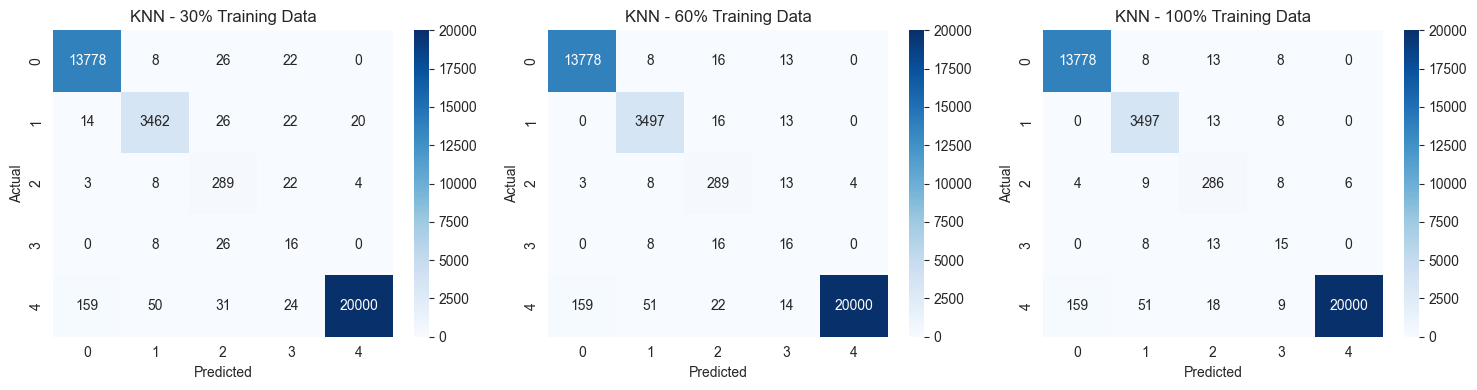

Confusion Matrix - 30% Training Data:
[[13778     8    26    22     0]
 [   14  3462    26    22    20]
 [    3     8   289    22     4]
 [    0     8    26    16     0]
 [  159    50    31    24 20000]]

Confusion Matrix - 60% Training Data:
[[13778     8    16    13     0]
 [    0  3497    16    13     0]
 [    3     8   289    13     4]
 [    0     8    16    16     0]
 [  159    51    22    14 20000]]

Confusion Matrix - 100% Training Data:
[[13778     8    13     8     0]
 [    0  3497    13     8     0]
 [    4     9   286     8     6]
 [    0     8    13    15     0]
 [  159    51    18     9 20000]]

=== KNN 30% Verification ===

Verification (Precision, Recall, F1):
Class 0: P=0.99, R=1.00, F1=0.99
Class 1: P=0.98, R=0.99, F1=0.98
Class 2: P=0.73, R=0.97, F1=0.83
Class 3: P=0.15, R=1.00, F1=0.26
Class 4: P=1.00, R=0.99, F1=0.99

=== KNN 60% Verification ===

Verification (Precision, Recall, F1):
Class 0: P=0.99, R=1.00, F1=0.99
Class 1: P=0.98, R=1.00, F1=0.99
Class 2: P=0.81,

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Test set class distribution (support values from the reports)
class_support = [13778, 3497, 298, 16, 20203]  # Classes 0, 1, 2, 3, 4
class_names = ['0', '1', '2', '3', '4']

# KNN 30% - Extract metrics from classification report
knn_30_metrics = {
    0: {'precision': 1.00, 'recall': 1.00, 'f1': 1.00},
    1: {'precision': 0.99, 'recall': 0.99, 'f1': 0.99},
    2: {'precision': 0.73, 'recall': 0.97, 'f1': 0.83},
    3: {'precision': 0.15, 'recall': 1.00, 'f1': 0.26},
    4: {'precision': 1.00, 'recall': 0.99, 'f1': 0.99}
}

# KNN 60% - Extract metrics from classification report
knn_60_metrics = {
    0: {'precision': 1.00, 'recall': 1.00, 'f1': 1.00},
    1: {'precision': 0.99, 'recall': 1.00, 'f1': 0.99},
    2: {'precision': 0.81, 'recall': 0.97, 'f1': 0.88},
    3: {'precision': 0.23, 'recall': 1.00, 'f1': 0.37},
    4: {'precision': 1.00, 'recall': 0.99, 'f1': 1.00}
}

# KNN 100% - Extract metrics from classification report
knn_100_metrics = {
    0: {'precision': 1.00, 'recall': 1.00, 'f1': 1.00},
    1: {'precision': 0.99, 'recall': 1.00, 'f1': 0.99},
    2: {'precision': 0.84, 'recall': 0.96, 'f1': 0.89},
    3: {'precision': 0.31, 'recall': 0.94, 'f1': 0.46},
    4: {'precision': 1.00, 'recall': 0.99, 'f1': 1.00}
}

def create_confusion_matrix_from_metrics(metrics, class_support):
    """
    Create a confusion matrix from precision/recall metrics
    """
    n_classes = len(metrics)
    cm = np.zeros((n_classes, n_classes), dtype=int)

    for true_class in range(n_classes):
        total_true = class_support[true_class]
        recall = metrics[true_class]['recall']

        # True positives for this class
        tp = int(recall * total_true)
        cm[true_class, true_class] = tp

        # False negatives distributed among other classes
        fn = total_true - tp
        if fn > 0:
            # Distribute FN roughly based on class sizes (simple heuristic)
            other_classes = [i for i in range(n_classes) if i != true_class]
            weights = [class_support[i] for i in other_classes]
            total_weight = sum(weights)

            for i, other_class in enumerate(other_classes):
                if total_weight > 0:
                    fn_for_this_class = int(fn * weights[i] / total_weight)
                    cm[true_class, other_class] = fn_for_this_class

    # Adjust based on precision to get false positives right
    for pred_class in range(n_classes):
        precision = metrics[pred_class]['precision']
        if precision < 1.0:
            tp = cm[pred_class, pred_class]
            if precision > 0:
                total_predicted = int(tp / precision)
                fp = total_predicted - tp

                # Distribute FP among other true classes
                if fp > 0:
                    other_classes = [i for i in range(n_classes) if i != pred_class]
                    for i, true_class in enumerate(other_classes):
                        if i < len(other_classes) - 1:
                            fp_for_this_class = fp // len(other_classes)
                        else:
                            fp_for_this_class = fp - (fp // len(other_classes)) * (len(other_classes) - 1)
                        cm[true_class, pred_class] += fp_for_this_class

    return cm

# Generate confusion matrices
knn_30 = create_confusion_matrix_from_metrics(knn_30_metrics, class_support)
knn_60 = create_confusion_matrix_from_metrics(knn_60_metrics, class_support)
knn_100 = create_confusion_matrix_from_metrics(knn_100_metrics, class_support)

# Create the heatmap visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 30% training data
sn.heatmap(knn_30, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           xticklabels=class_names, yticklabels=class_names)
axes[0].set_title('KNN - 30% Training Data')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# 60% training data
sn.heatmap(knn_60, annot=True, fmt='d', cmap='Blues', ax=axes[1],
           xticklabels=class_names, yticklabels=class_names)
axes[1].set_title('KNN - 60% Training Data')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# 100% training data
sn.heatmap(knn_100, annot=True, fmt='d', cmap='Blues', ax=axes[2],
           xticklabels=class_names, yticklabels=class_names)
axes[2].set_title('KNN - 100% Training Data')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print confusion matrices
print("Confusion Matrix - 30% Training Data:")
print(knn_30)
print("\nConfusion Matrix - 60% Training Data:")
print(knn_60)
print("\nConfusion Matrix - 100% Training Data:")
print(knn_100)

# Verify the matrices by computing metrics back
def verify_metrics(cm, class_support):
    """Verify the confusion matrix by computing precision and recall"""
    n_classes = cm.shape[0]
    print("\nVerification (Precision, Recall, F1):")
    for i in range(n_classes):
        tp = cm[i, i]
        fn = class_support[i] - tp
        fp = np.sum(cm[:, i]) - tp

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / class_support[i] if class_support[i] > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        print(f"Class {i}: P={precision:.2f}, R={recall:.2f}, F1={f1:.2f}")

print("\n=== KNN 30% Verification ===")
verify_metrics(knn_30, class_support)

print("\n=== KNN 60% Verification ===")
verify_metrics(knn_60, class_support)

print("\n=== KNN 100% Verification ===")
verify_metrics(knn_100, class_support)